# Pima Indian Diabetes Data
This is based on Jerry Kurata's Pluralsight course.

## Initialisation

In [1]:
# Load data
import pandas as pd
df = pd.read_csv("pima-data.csv")
print("Loaded DataFrame of size " + str(df.shape))
print(df.head())

Loaded DataFrame of size (768, 10)
   num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  diab_pred  \
0         6           148            72         35        0  33.6      0.627   
1         1            85            66         29        0  26.6      0.351   
2         8           183            64          0        0  23.3      0.672   
3         1            89            66         23       94  28.1      0.167   
4         0           137            40         35      168  43.1      2.288   

   age    skin  diabetes  
0   50  1.3790      True  
1   31  1.1426     False  
2   32  0.0000      True  
3   21  0.9062     False  
4   33  1.3790      True  


In [2]:
# Check for null values
print(df.isnull().any(axis=0))

num_preg        False
glucose_conc    False
diastolic_bp    False
thickness       False
insulin         False
bmi             False
diab_pred       False
age             False
skin            False
diabetes        False
dtype: bool


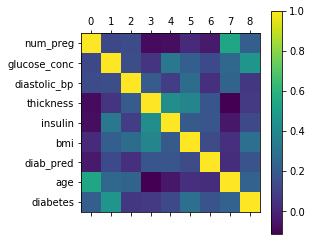

In [9]:
# Check for correlated values
import matplotlib.pyplot as plt
#%matplotlib inline  
corr = df.corr()
# fig, ax = plt.subplots()
plt.matshow(corr)
plt.yticks(range(len(corr.columns)), corr.columns);
plt.colorbar()
plt.show()

In [4]:
# Delete redundant column
del df['skin']

In [10]:
# Check number of zero values
(df == 0).astype(int).sum(axis=0) # sum across columns

num_preg        111
glucose_conc      5
diastolic_bp     35
thickness       227
insulin         374
bmi              11
diab_pred         0
age               0
diabetes        500
dtype: int64

In [5]:
# Convert boolean column to int
df['diabetes'] = df['diabetes'].astype('int')
print(df.head())

   num_preg  glucose_conc  diastolic_bp  thickness  insulin   bmi  diab_pred  \
0         6           148            72         35        0  33.6      0.627   
1         1            85            66         29        0  26.6      0.351   
2         8           183            64          0        0  23.3      0.672   
3         1            89            66         23       94  28.1      0.167   
4         0           137            40         35      168  43.1      2.288   

   age  diabetes  
0   50         1  
1   31         0  
2   32         1  
3   21         0  
4   33         1  


In [58]:
# Check proportion of True rows
import numpy as np

def print_true_false_ratio(data):
    if type(data) == pd.DataFrame:
        count_true = len(data.loc[data['diabetes'] == 1])
        count_false = len(data.loc[data['diabetes'] == 0])
    elif type(data) == np.ndarray: # one-column numpy array
        count_true = data.sum()
        count_false = len(data[data == 0])
    total = count_true + count_false
    print(f"Number of True cases is {count_true} out of {total} ({count_true*100.0/total:.2f}%).")
    print(f"Number of False cases is {count_false} out of {total} ({count_false*100.0/total:.2f}%).")
    
print_true_false_ratio(df)

Number of True cases is 268 out of 768 (34.90%).
Number of False cases is 500 out of 768 (65.10%).


In [56]:
# Split the data into training and test sets
from sklearn.cross_validation import train_test_split

input_col_names = list(df.columns.values) # predictor columns
del input_col_names[input_col_names.index('diabetes')]
output_col_names = ['diabetes'] # output column
X = df[input_col_names].values # input data as ndarray
y = df[output_col_names].values # output data as ndarray
split_test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=802)
print("Size and type of post-split data:",X_train.shape, type(X_train), 
      X_test.shape, type(X_train), y_train.shape, type(y_train), y_test.shape, type(y_test))


Size and type of post-split data: (537, 8) <class 'numpy.ndarray'> (231, 8) <class 'numpy.ndarray'> (537, 1) <class 'numpy.ndarray'> (231, 1) <class 'numpy.ndarray'>


In [59]:
print("In training data:")
print_true_false_ratio(y_train)
print("In test data:")
print_true_false_ratio(y_test)

In training data:
Number of True cases is 190 out of 537 (35.38%).
Number of False cases is 347 out of 537 (64.62%).
In test data:
Number of True cases is 78 out of 231 (33.77%).
Number of False cases is 153 out of 231 (66.23%).


In [21]:
# Fix null values by replacing them with the mean
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values=0, strategy='mean', axis=0, verbose=1)
print("Number of zero values =", (X_train == 0).sum(axis=0), "and", (X_test == 0).sum(axis=0))
X_train_fixed = imputer.fit_transform(X_train)
X_test_fixed = imputer.fit_transform(X_test)
print("Number of zero values =", (X_train_fixed == 0).sum(axis=0), "and", (X_test_fixed == 0).sum(axis=0))

Number of zero values = num_preg         83
glucose_conc      3
diastolic_bp     24
thickness       153
insulin         254
bmi               9
diab_pred         0
age               0
dtype: int64 and num_preg         28
glucose_conc      2
diastolic_bp     11
thickness        74
insulin         120
bmi               2
diab_pred         0
age               0
dtype: int64
Number of zero values = [0 0 0 0 0 0 0 0] and [0 0 0 0 0 0 0 0]
